## This notebook will construct the nodes and edges that we will build our graph with

Import relevant libraries and import raw data

In [1]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os_name = os.name

if os_name == 'nt':
    password = os.getenv('NEO4J_Password')
    neo4j_directory = os.getenv('NEO4J_Directory')
else:
    password = os.environ['NEO4J_Password']
    neo4j_directory = os.environ['NEO4J_Directory']

In [39]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")

In [40]:
def normalise(absorbances):
    max_value = np.max(absorbances)
    normalized_absorbances = absorbances / max_value
    return normalized_absorbances

df['Absorbance'] = df.groupby('SpecID')['Absorbance'].transform(lambda x: normalise(x))

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

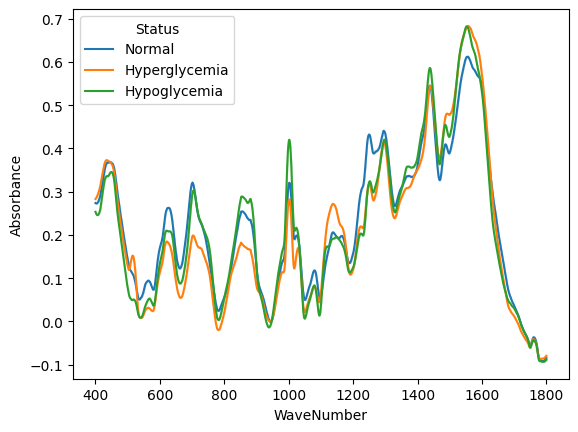

In [46]:
sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

Here we use scipy's function "find_peaks" to find all peaks in each individual spectra sample as well as pulling featurse such as prominence and width of peaks

In [38]:
df

,WaveNumber,Status,SurID,Absorbance
0,400.22778,Hyperglycemia,210120-1,0.288292
1,400.22778,Hyperglycemia,210120-2,0.283668
2,400.22778,Hyperglycemia,210121-1,0.233526
3,400.22778,Hyperglycemia,210121-2,0.262955
4,400.22778,Hyperglycemia,210211-1,0.196753
...,...,...,...,...
129082,1799.77220,Normal,210421-1,-0.160775
129083,1799.77220,Normal,210428-1,-0.219247
129084,1799.77220,Normal,210428-2,-0.258882
129085,1799.77220,Normal,210428-3,-0.163821


In [6]:
df = df.groupby(["WaveNumber", "Status", "SurID"])["Absorbance"].median().reset_index()

In [7]:
pivoted_df = df.pivot(index='SurID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None
statuses = df[['SurID', 'Status']].drop_duplicates()
pivoted_df = pd.merge(pivoted_df, statuses, on='SurID')
pivoted_df = pivoted_df.set_index('SurID')

In [8]:
pivoted_df

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.3053,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,Status
SurID,,,,,,,,,,,,,,,,,,,,,
201210-1,-0.058689,-0.066991,-0.074928,-0.082501,-0.089709,-0.096553,-0.103032,-0.109147,-0.114897,-0.120283,...,0.032843,0.031218,0.027258,0.023062,0.018629,0.013959,0.009052,0.003909,-0.001471,Normal
201210-2,0.007729,0.002413,-0.001217,-0.002609,-0.002185,-0.003564,-0.009344,-0.008238,-0.010361,-0.010655,...,-0.184560,-0.183300,-0.181898,-0.180022,-0.177437,-0.176293,-0.173221,-0.170003,-0.169641,Normal
210114-1,0.387279,0.393415,0.398930,0.397568,0.397699,0.400255,0.398940,0.397563,0.397306,0.394620,...,-0.194537,-0.193099,-0.188871,-0.185867,-0.184492,-0.182974,-0.180242,-0.176794,-0.172411,Normal
210114-2,0.255064,0.266620,0.277900,0.286449,0.294616,0.297832,0.300375,0.304052,0.308899,0.310924,...,-0.114605,-0.113364,-0.112946,-0.112420,-0.111784,-0.111956,-0.109548,-0.106261,-0.106235,Normal
210120-1,0.288292,0.289058,0.283517,0.281542,0.282742,0.275469,0.265132,0.255318,0.246028,0.237438,...,-0.061323,-0.059542,-0.056989,-0.054686,-0.053420,-0.054195,-0.055019,-0.053642,-0.053484,Hyperglycemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210519-3,0.261917,0.265817,0.275897,0.278023,0.280026,0.283618,0.288373,0.292924,0.296343,0.299475,...,-0.138533,-0.136116,-0.136396,-0.137041,-0.133385,-0.133307,-0.135453,-0.137581,-0.137387,Hyperglycemia
210524-1,-0.018318,-0.015001,-0.012765,-0.015358,-0.016529,-0.019422,-0.022096,-0.024551,-0.026788,-0.028422,...,-0.202377,-0.199518,-0.196421,-0.193086,-0.189513,-0.191280,-0.193641,-0.192822,-0.190013,Hypoglycemia
210526-1,-0.115204,-0.123071,-0.125662,-0.132850,-0.137412,-0.138584,-0.136589,-0.141243,-0.141089,-0.144197,...,-0.161344,-0.162009,-0.162742,-0.159979,-0.158991,-0.156918,-0.152557,-0.151526,-0.149992,Hyperglycemia


In [9]:
status_df = pivoted_df['Status']

In [10]:
status_df = status_df.reset_index()

In [11]:
peaks = []
widths = []
prom = []

for _, group in df.groupby('SurID'):
    peak_index, weights = find_peaks(x=group['Absorbance'], distance=10, width=10)
    peaks += list(group.iloc[peak_index].index.values)
    widths += list(weights['widths'])
    prom += list(weights['prominences'])

In [14]:
print(len(peaks))

1142


Below shows a scatterplot of the coordinates of all the peaks we have found

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

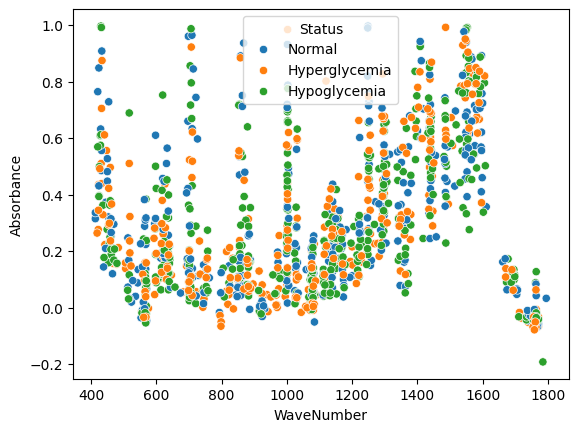

In [15]:
sns.scatterplot(data=df.iloc[peaks].reset_index(), x="WaveNumber", y="Absorbance", hue="Status")

We then add the peak information to our main dataframe

In [16]:
peak_df = df.iloc[peaks]
peak_df['Widths'] = widths
peak_df['Prominences'] = prom

C:\Users\stang\AppData\Local\Temp\ipykernel_12364\2901317241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Widths'] = widths
C:\Users\stang\AppData\Local\Temp\ipykernel_12364\2901317241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Prominences'] = prom


In [17]:
peak_df

,WaveNumber,Status,SurID,Absorbance,Widths,Prominences
6467,469.93167,Normal,201210-1,0.295378,73.973526,0.242838
15476,567.65375,Normal,201210-1,0.223674,14.026237,0.030748
20264,619.58997,Normal,201210-1,0.457190,69.527171,0.330873
27509,698.17767,Normal,201210-1,0.960494,67.260943,0.985178
41936,854.66968,Normal,201210-1,0.469561,14.423201,0.015300
...,...,...,...,...,...,...
93510,1414.35080,Hyperglycemia,210526-3,0.598462,11.995397,0.028293
95589,1436.90210,Hyperglycemia,210526-3,0.658121,78.497474,0.285615
100188,1486.78820,Hyperglycemia,210526-3,0.596577,16.481577,0.117718
106425,1554.44190,Hyperglycemia,210526-3,0.904158,207.620511,0.982393


In [18]:
peaks = [[407, 495], [453,454], [516,537], 519, [603,738], [620, 624], [821, 839], [866, 887], 972, [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], 1170, [1188, 1196], [1212-1294], [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], 1668]

In [20]:
# Peaks list, corrected format
peaks_corrected = [[407, 495], [453, 454], [516, 537], [519, 519], [603, 738], [620, 624], [821, 839], [866, 887], [972, 972], 
         [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], [1170, 1170], [1188, 1196], [1212, 1294], 
         [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], [1668, 1668]]

# Convert peaks to a more efficient structure for processing
peak_ranges = [(peak[0], peak[1]) for peak in peaks_corrected]

# Create a function to determine the peak range for each WaveNumber
def find_peak_range(wavenumber):
    for start, end in peak_ranges:
        if start <= wavenumber <= end:
            return f"{start}-{end}"
    return None

# Apply the function to create a new column for peak range
peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)

# Now, group by both SpecID and the new PeakRange column, and compute max Absorbance for each group
grouped = peak_df.groupby(['SurID', 'PeakRange'])['Absorbance'].max().reset_index()

# Pivot the table to have SpecID as rows and PeakRange as columns, filled with max Absorbance values
efficient_pivot_df = grouped.pivot(index='SurID', columns='PeakRange', values='Absorbance').reset_index()

# Fill NaN values with an appropriate placeholder if needed (e.g., 0 or empty string), here we keep NaNs
efficient_pivot_df

C:\Users\stang\AppData\Local\Temp\ipykernel_12364\4027960324.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)


PeakRange,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887
0,201210-1,NaN,NaN,NaN,0.087231,NaN,0.279230,0.333848,NaN,NaN,0.392664,0.295378,NaN,0.960494,NaN,0.479237
1,201210-2,NaN,NaN,NaN,0.183158,NaN,0.507239,0.635203,NaN,NaN,0.887520,0.229211,NaN,0.633354,NaN,NaN
2,210114-1,NaN,NaN,NaN,0.343212,NaN,0.819568,0.554622,NaN,NaN,0.715258,0.372932,NaN,0.267060,NaN,0.047185
3,210114-2,NaN,NaN,NaN,NaN,NaN,0.532867,0.454209,NaN,NaN,0.615240,0.314748,NaN,0.175106,NaN,-0.006132
4,210120-1,NaN,NaN,0.063625,0.110998,NaN,0.321952,NaN,NaN,NaN,0.666833,0.223109,NaN,0.119592,0.045332,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.402753,0.108629,NaN,NaN,NaN,0.114548,0.557734,NaN,NaN,0.849738,0.344593,NaN,0.297029,NaN,0.074993
59,210524-1,0.504524,NaN,NaN,0.417898,NaN,0.542800,0.741770,NaN,NaN,0.883116,0.207230,0.689040,0.349613,NaN,NaN
60,210526-1,NaN,NaN,NaN,0.253525,NaN,0.555995,NaN,NaN,NaN,0.945225,0.236481,0.193717,0.621405,NaN,NaN
61,210526-2,0.984194,NaN,NaN,0.420138,NaN,0.677248,NaN,NaN,NaN,0.950521,0.422359,0.322463,0.922367,NaN,NaN


In [21]:
# Replace all NaN values with 0
efficient_pivot_df_filled = efficient_pivot_df.fillna(0)

efficient_pivot_df_filled

PeakRange,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887
0,201210-1,0.000000,0.000000,0.000000,0.087231,0.0,0.279230,0.333848,0.0,0.0,0.392664,0.295378,0.000000,0.960494,0.000000,0.479237
1,201210-2,0.000000,0.000000,0.000000,0.183158,0.0,0.507239,0.635203,0.0,0.0,0.887520,0.229211,0.000000,0.633354,0.000000,0.000000
2,210114-1,0.000000,0.000000,0.000000,0.343212,0.0,0.819568,0.554622,0.0,0.0,0.715258,0.372932,0.000000,0.267060,0.000000,0.047185
3,210114-2,0.000000,0.000000,0.000000,0.000000,0.0,0.532867,0.454209,0.0,0.0,0.615240,0.314748,0.000000,0.175106,0.000000,-0.006132
4,210120-1,0.000000,0.000000,0.063625,0.110998,0.0,0.321952,0.000000,0.0,0.0,0.666833,0.223109,0.000000,0.119592,0.045332,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.402753,0.108629,0.000000,0.000000,0.0,0.114548,0.557734,0.0,0.0,0.849738,0.344593,0.000000,0.297029,0.000000,0.074993
59,210524-1,0.504524,0.000000,0.000000,0.417898,0.0,0.542800,0.741770,0.0,0.0,0.883116,0.207230,0.689040,0.349613,0.000000,0.000000
60,210526-1,0.000000,0.000000,0.000000,0.253525,0.0,0.555995,0.000000,0.0,0.0,0.945225,0.236481,0.193717,0.621405,0.000000,0.000000
61,210526-2,0.984194,0.000000,0.000000,0.420138,0.0,0.677248,0.000000,0.0,0.0,0.950521,0.422359,0.322463,0.922367,0.000000,0.000000


In [22]:
# Add back "Status" and "SurID" columns by joining on "SpecID"
# First, create a DataFrame with unique SpecID, Status, and SurID
status_surid_df = peak_df[['Status', 'SurID']].drop_duplicates()

# Merge this back into the efficient pivot table
pivot_df_with_status_surid = efficient_pivot_df_filled.merge(status_surid_df, on='SurID', how='left')

pivot_df_with_status_surid

,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887,Status
0,201210-1,0.000000,0.000000,0.000000,0.087231,0.0,0.279230,0.333848,0.0,0.0,0.392664,0.295378,0.000000,0.960494,0.000000,0.479237,Normal
1,201210-2,0.000000,0.000000,0.000000,0.183158,0.0,0.507239,0.635203,0.0,0.0,0.887520,0.229211,0.000000,0.633354,0.000000,0.000000,Normal
2,210114-1,0.000000,0.000000,0.000000,0.343212,0.0,0.819568,0.554622,0.0,0.0,0.715258,0.372932,0.000000,0.267060,0.000000,0.047185,Normal
3,210114-2,0.000000,0.000000,0.000000,0.000000,0.0,0.532867,0.454209,0.0,0.0,0.615240,0.314748,0.000000,0.175106,0.000000,-0.006132,Normal
4,210120-1,0.000000,0.000000,0.063625,0.110998,0.0,0.321952,0.000000,0.0,0.0,0.666833,0.223109,0.000000,0.119592,0.045332,0.000000,Hyperglycemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.402753,0.108629,0.000000,0.000000,0.0,0.114548,0.557734,0.0,0.0,0.849738,0.344593,0.000000,0.297029,0.000000,0.074993,Hyperglycemia
59,210524-1,0.504524,0.000000,0.000000,0.417898,0.0,0.542800,0.741770,0.0,0.0,0.883116,0.207230,0.689040,0.349613,0.000000,0.000000,Hypoglycemia
60,210526-1,0.000000,0.000000,0.000000,0.253525,0.0,0.555995,0.000000,0.0,0.0,0.945225,0.236481,0.193717,0.621405,0.000000,0.000000,Hyperglycemia
61,210526-2,0.984194,0.000000,0.000000,0.420138,0.0,0.677248,0.000000,0.0,0.0,0.950521,0.422359,0.322463,0.922367,0.000000,0.000000,Hyperglycemia


In [24]:
node_df = pivot_df_with_status_surid[['Status', 'SurID']]
node_df.rename(columns={'SurID':'SurID:ID', 'Status':'Status:LABEL'}, inplace=True)

C:\Users\stang\AppData\Local\Temp\ipykernel_12364\2102331677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_df.rename(columns={'SurID':'SurID:ID', 'Status':'Status:LABEL'}, inplace=True)


In [25]:
node_df.to_csv(f"{neo4j_directory}/import/nodes.csv", index=False)

In [26]:
features_df = pivot_df_with_status_surid.drop(['SurID', 'Status', 'SurID'], axis=1)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(features_df)

# If you want to convert it to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=pivot_df_with_status_surid['SurID'], columns=pivot_df_with_status_surid['SurID'])

In [28]:
cosine_sim_df

SurID,201210-1,201210-2,210114-1,210114-2,210120-1,210120-2,210121-1,210121-2,210211-1,210211-2,...,210510-2,210511-1,210518-1,210519-1,210519-2,210519-3,210524-1,210526-1,210526-2,210526-3
SurID,,,,,,,,,,,,,,,,,,,,,
201210-1,1.000000,0.794544,0.654535,0.634952,0.541261,0.781356,0.542966,0.576122,0.292017,0.562604,...,0.500249,0.581436,0.584890,0.644192,0.661377,0.645731,0.569763,0.729101,0.668913,0.808393
201210-2,0.794544,1.000000,0.916212,0.926358,0.816587,0.902753,0.889299,0.795807,0.367462,0.893628,...,0.688787,0.580003,0.636558,0.845548,0.835686,0.860843,0.821428,0.878443,0.732728,0.916513
210114-1,0.654535,0.916212,1.000000,0.958453,0.834103,0.840255,0.834000,0.794904,0.437851,0.880261,...,0.725525,0.653433,0.699105,0.942623,0.741884,0.756675,0.813529,0.825861,0.692422,0.855418
210114-2,0.634952,0.926358,0.958453,1.000000,0.847947,0.887611,0.821227,0.754507,0.350160,0.885001,...,0.717393,0.672185,0.635326,0.926391,0.821099,0.833656,0.790151,0.803485,0.650441,0.894238
210120-1,0.541261,0.816587,0.834103,0.847947,1.000000,0.724922,0.839946,0.937878,0.214533,0.859693,...,0.855033,0.367108,0.359231,0.705503,0.728506,0.753023,0.688924,0.918931,0.727891,0.772032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210519-3,0.645731,0.860843,0.756675,0.833656,0.753023,0.952892,0.848704,0.765037,0.258417,0.865197,...,0.705033,0.618972,0.566839,0.794215,0.963714,1.000000,0.816808,0.716195,0.744853,0.859341
210524-1,0.569763,0.821428,0.813529,0.790151,0.688924,0.828205,0.825369,0.716331,0.367363,0.806993,...,0.630286,0.552800,0.811928,0.836079,0.771786,0.816808,1.000000,0.757120,0.801936,0.823106
210526-1,0.729101,0.878443,0.825861,0.803485,0.918931,0.733790,0.806441,0.901112,0.245877,0.782380,...,0.778125,0.360314,0.516530,0.688323,0.690317,0.716195,0.757120,1.000000,0.839599,0.804317


In [29]:
kernel_df = cosine_sim_df

In [30]:
relationship_df = kernel_df.reset_index()
relationship_df = relationship_df.melt(id_vars='SurID', var_name=':END_ID', value_name='Weight:float')
relationship_df = relationship_df.rename(columns={'SurID': ':START_ID'})
relationship_df[':TYPE'] = 'LINK'

In [31]:
relationship_df = relationship_df[relationship_df[":START_ID"] != relationship_df[":END_ID"]]
relationship_df = relationship_df[relationship_df[":START_ID"] < relationship_df[":END_ID"]]

In [32]:
relationship_df

,:START_ID,:END_ID,Weight:float,:TYPE
63,201210-1,201210-2,0.794544,LINK
126,201210-1,210114-1,0.654535,LINK
127,201210-2,210114-1,0.916212,LINK
189,201210-1,210114-2,0.634952,LINK
190,201210-2,210114-2,0.926358,LINK
...,...,...,...,...
3963,210519-2,210526-3,0.818088,LINK
3964,210519-3,210526-3,0.859341,LINK
3965,210524-1,210526-3,0.823106,LINK
3966,210526-1,210526-3,0.804317,LINK


In [36]:
node_df

,Status:LABEL,SurID:ID
0,Normal,201210-1
1,Normal,201210-2
2,Normal,210114-1
3,Normal,210114-2
4,Hyperglycemia,210120-1
...,...,...
58,Hyperglycemia,210519-3
59,Hypoglycemia,210524-1
60,Hyperglycemia,210526-1
61,Hyperglycemia,210526-2


In [33]:
relationship_df.to_csv(f"{neo4j_directory}/import/relationships.csv", index=False)

In [34]:
from neo4j import GraphDatabase
import os
import pandas as pd
import shutil
import subprocess

This moves the nodes and relationships files from data/current_working_graph into the DBMS import folder.

At the moment this uses local paths, but the rest should be automated.

Then run the admin import command.

In [35]:
os_name = os.name

if os_name == 'nt':
    working_dir = f'{neo4j_directory}/bin'
    command = 'neo4j-admin database import full --nodes=import/nodes.csv --relationships=import/relationships.csv --overwrite-destination neo4j'
    result = subprocess.run(command, shell=True, cwd=working_dir, capture_output=True, text=True)
else:
    working_dir = f'{neo4j_directory}'
    command = [
    './bin/neo4j-admin', 'database', 'import', 'full',
    '--nodes=import/nodes.csv',
    '--relationships=import/relationships.csv',
    '--overwrite-destination',  'neo4j'
    ]
    result = subprocess.run(command, cwd=working_dir, stdout=subprocess.PIPE, stderr=subprocess.PIPE)


# Check if the command was successful
if result.returncode == 0:
    print("Import successful")
    print(result.stdout)
else:
    print("Error during import:")
    print(result.stderr)

Import successful
Neo4j version: 5.12.0
Importing the contents of these files into C:\Users\stang\.Neo4jDesktop\relate-data\dbmss\dbms-d0a05d27-d2ec-404f-a7c3-e7f4b6a97351\data\databases\neo4j:
Nodes:
  C:\Users\stang\.Neo4jDesktop\relate-data\dbmss\dbms-d0a05d27-d2ec-404f-a7c3-e7f4b6a97351\import\nodes.csv

Relationships:
  C:\Users\stang\.Neo4jDesktop\relate-data\dbmss\dbms-d0a05d27-d2ec-404f-a7c3-e7f4b6a97351\import\relationships.csv


Available resources:
  Total machine memory: 31.86GiB
  Free machine memory: 21.83GiB
  Max heap memory : 910.5MiB
  Max worker threads: 8
  Configured max memory: 18.95GiB
  High parallel IO: true

Cypher type normalization is enabled (disable with --normalize-types=false):
  Property type of 'Weight' normalized from 'float' --> 'double' in C:\Users\stang\.Neo4jDesktop\relate-data\dbmss\dbms-d0a05d27-d2ec-404f-a7c3-e7f4b6a97351\import\relationships.csv

Import starting 2024-03-24 15:06:44.358+0000
  Estimated number of nodes: 64.00 
  Estimated numbe

In [ ]:
if os_name != 'nt':
    command = [
        './bin/neo4j', 'restart'
    ]

    result = subprocess.run(command, cwd=neo4j_directory, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Check if the command was successful
    if result.returncode == 0:
        print("Restart successful")
        print(result.stdout)
    else:
        print("Error during restart:")
        print(result.stderr)

Run and connect to the Neo4j Database

In [55]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"              # Neo4J username
#Password defined at the top of the notebook

# Create a driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

# Ensure you close the driver connection when your program ends
def close_driver():
    driver.close()

**First create the gds Graph Projection**

In [56]:
def project_graph(tx):
    query = """
    CALL gds.graph.project(
      'myGraph', 
      ['Normal', 'Hyperglycemia', 'Hypoglycemia'],
      {
        LINK: {
          orientation: 'UNDIRECTED',
          properties: 'Weight'
        }
      }
    )
    """
    tx.run(query)

# Use a session to execute the graph projection
with driver.session() as session:
    session.execute_write(project_graph)

Define the graph algorithms.

In [57]:
def run_pagerank_centrality(tx):
    query = """
    CALL gds.pageRank.stream('myGraph', {
        relationshipWeightProperty: 'Weight'
    })
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).SurID AS name, score
    ORDER BY score DESC, name ASC
    """
    results = tx.run(query)
    return [(record["name"], record["score"]) for record in results]

In [58]:
def run_degree_centrality(tx):
    query = """
    CALL gds.degree.stream('myGraph', {
        relationshipWeightProperty: 'Weight'
    })
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).SurID AS name, score
    ORDER BY score DESC, name ASC
    """
    results = tx.run(query)
    return [(record["name"], record["score"]) for record in results]

In [59]:
def run_eigenvector_centrality(tx):
    query = """
    CALL gds.eigenvector.stream('myGraph', {
        relationshipWeightProperty: 'Weight'
    })
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).SurID AS name, score
    ORDER BY score DESC, name ASC
    """
    results = tx.run(query)
    return [(record["name"], record["score"]) for record in results]

In [60]:
def run_articlerank_centrality(tx):
    query = """
    CALL gds.articleRank.stream('myGraph', {
        relationshipWeightProperty: 'Weight'
    })
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).SurID AS name, score
    ORDER BY score DESC, name ASC
    """
    results = tx.run(query)
    return [(record["name"], record["score"]) for record in results]

In [61]:
def run_label_propagation_algorithm(tx):
    query = """
    CALL gds.labelPropagation.stream('myGraph', { relationshipWeightProperty: 'Weight' })
    YIELD nodeId, communityId AS Community
    RETURN gds.util.asNode(nodeId).SurID AS name, Community
    ORDER BY Community, name
    """
    results = tx.run(query)
    return [(record["name"], record["Community"]) for record in results]

In [62]:
def run_leiden_algorithm(tx):
    query = """
    CALL gds.leiden.stream('myGraph', { relationshipWeightProperty: 'Weight' })
    YIELD nodeId, communityId AS Community
    RETURN gds.util.asNode(nodeId).SurID AS name, Community
    ORDER BY Community, name
    """
    results = tx.run(query)
    return [(record["name"], record["Community"]) for record in results]

In [63]:
def run_louvain_algorithm(tx):
    query = """
    CALL gds.louvain.stream('myGraph', { relationshipWeightProperty: 'Weight' })
    YIELD nodeId, communityId AS Community
    RETURN gds.util.asNode(nodeId).SurID AS name, Community
    ORDER BY Community, name
    """
    results = tx.run(query)
    return [(record["name"], record["Community"]) for record in results]

In [64]:
def run_node2vec_algorithm(tx):
    query = """
    CALL gds.node2vec.stream('myGraph', { relationshipWeightProperty: 'Weight' })
    YIELD nodeId, embedding
    RETURN gds.util.asNode(nodeId).SurID AS name, embedding
    """
    results = tx.run(query)
    return [(record["name"], record["embedding"]) for record in results]

In [65]:
def run_fastRP_algorithm(tx):
    query = """
    CALL gds.fastRP.stream('myGraph',
        { relationshipWeightProperty: 'Weight',
         randomSeed:1234,
         embeddingDimension: 128
        }
    )
    YIELD nodeId, embedding
    RETURN gds.util.asNode(nodeId).SurID AS name, embedding
    """
    results = tx.run(query)
    return [(record["name"], record["embedding"]) for record in results]

Execute the algorithms and store the results in a Dataframe.

In [66]:
# Use a session to execute the queries and retrieve the results
with driver.session() as session:
    pagerank_results = session.execute_read(run_pagerank_centrality)
    degree_results = session.execute_read(run_degree_centrality)
    eigenvector_results = session.execute_read(run_eigenvector_centrality)
    articlerank_results = session.execute_read(run_articlerank_centrality)
    label_propagation_results = session.execute_read(run_label_propagation_algorithm)
    leiden_results = session.execute_read(run_leiden_algorithm)
    louvain_results = session.execute_read(run_louvain_algorithm)

In [67]:
pagerank_df = pd.DataFrame(pagerank_results, columns=['name', 'PageRank'])
degree_df = pd.DataFrame(degree_results, columns=['name', 'DegreeCentrality'])
eigenvector_df = pd.DataFrame(eigenvector_results, columns=['name', 'EigenvectorCentrality'])
articlerank_df = pd.DataFrame(articlerank_results, columns=['name', 'ArticleRank'])
label_propagation_df = pd.DataFrame(label_propagation_results, columns=['name', 'LabelPropagation'])
leiden_df = pd.DataFrame(leiden_results, columns=['name', 'Leiden'])
louvain_df = pd.DataFrame(louvain_results, columns=['name', 'Louvain'])

In [68]:
merged_df = pagerank_df
for df in [degree_df, eigenvector_df, articlerank_df, leiden_df, louvain_df]:
    merged_df = pd.merge(merged_df, df, on=['name'], how='left')

In [69]:
df = merged_df.rename(columns={'name' : 'SurID'})
df

,SurID,PageRank,DegreeCentrality,EigenvectorCentrality,ArticleRank,Leiden,Louvain
0,210120-2,1.066556,50.933572,0.141482,0.244373,0,18
1,210505-1,1.061224,50.639134,0.140664,0.243825,0,18
2,210303-2,1.057692,50.437632,0.140105,0.243457,0,18
3,210324-1,1.055017,50.304457,0.139735,0.243198,0,18
4,210504-1,1.050611,50.071016,0.139086,0.242759,0,18
...,...,...,...,...,...,...,...
58,210429-1,0.826333,37.573935,0.104372,0.219628,2,43
59,210407-1,0.825272,37.471294,0.104087,0.219450,2,43
60,210311-1,0.822136,37.324738,0.103680,0.219162,0,18
61,210518-1,0.813073,36.805702,0.102238,0.218214,0,18


In [70]:
with driver.session() as session:
    fastRP_results = session.execute_read(run_fastRP_algorithm)

fastRP_df = pd.DataFrame(fastRP_results, columns=['SurID', 'embeddings'])

# Expand the embeddings list into separate columns
embeddings_df = pd.DataFrame(fastRP_df['embeddings'].tolist(), index=fastRP_df.index)

# Optionally, rename the new columns
embeddings_df.columns = [f'embedding_{i}' for i in range(embeddings_df.shape[1])]

# Join the new embeddings columns to the original DataFrame
fastRP_df = pd.concat([fastRP_df.drop(['embeddings'], axis=1), embeddings_df], axis=1)
fastRP_df.to_csv('../../data/fastRP_embeddings.csv', index=False)
fastRP_df.head()

,SurID,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,...,embedding_118,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127
0,201210-1,0.148074,0.062992,-0.086053,-0.013960,-0.094132,0.093681,-0.076875,0.099170,-0.104518,...,0.362389,-0.045680,-0.114490,0.136893,-0.061356,-0.126552,-0.119260,-0.119269,-0.084268,0.051636
1,201210-2,0.148044,0.063032,-0.086974,-0.013786,-0.092909,0.094044,-0.076408,0.099270,-0.103982,...,0.362324,-0.046032,-0.112472,0.136427,-0.061472,-0.126235,-0.118634,-0.120265,-0.085383,0.052064
2,210114-1,0.147864,0.062416,-0.086824,-0.013481,-0.093673,0.094785,-0.076168,0.099154,-0.103975,...,0.362557,-0.046539,-0.112776,0.136170,-0.061643,-0.126523,-0.119153,-0.119744,-0.084853,0.051985
3,210114-2,0.147349,0.062351,-0.086448,-0.013313,-0.093593,0.094751,-0.076623,0.099181,-0.103776,...,0.362583,-0.046065,-0.113099,0.136091,-0.061563,-0.127183,-0.118543,-0.119781,-0.085047,0.052079
4,210120-1,0.148864,0.065607,-0.086003,-0.013842,-0.091871,0.094693,-0.076708,0.098820,-0.106134,...,0.361995,-0.046259,-0.110904,0.137079,-0.061162,-0.125793,-0.119311,-0.122582,-0.086542,0.052334


In [71]:
status_df

,SurID,Status
0,201210-1,Normal
1,201210-2,Normal
2,210114-1,Normal
3,210114-2,Normal
4,210120-1,Hyperglycemia
...,...,...
58,210519-3,Hyperglycemia
59,210524-1,Hypoglycemia
60,210526-1,Hyperglycemia
61,210526-2,Hyperglycemia


In [72]:
df

,SurID,PageRank,DegreeCentrality,EigenvectorCentrality,ArticleRank,Leiden,Louvain
0,210120-2,1.066556,50.933572,0.141482,0.244373,0,18
1,210505-1,1.061224,50.639134,0.140664,0.243825,0,18
2,210303-2,1.057692,50.437632,0.140105,0.243457,0,18
3,210324-1,1.055017,50.304457,0.139735,0.243198,0,18
4,210504-1,1.050611,50.071016,0.139086,0.242759,0,18
...,...,...,...,...,...,...,...
58,210429-1,0.826333,37.573935,0.104372,0.219628,2,43
59,210407-1,0.825272,37.471294,0.104087,0.219450,2,43
60,210311-1,0.822136,37.324738,0.103680,0.219162,0,18
61,210518-1,0.813073,36.805702,0.102238,0.218214,0,18


In [73]:
graph_df = pd.merge(df, status_df, left_on="SurID", right_on="SurID", how="inner")

In [74]:
fast_graph_df = pd.merge(fastRP_df, status_df, left_on="SurID", right_on="SurID", how="inner")

In [75]:
graph_df.rename(columns={"Status:LABEL":"Status"}, inplace=True)

In [76]:
fast_graph_df.rename(columns={"Status:LABEL":"Status"}, inplace=True)

In [77]:
fast_graph_df

,SurID,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,...,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,Status
0,201210-1,0.148074,0.062992,-0.086053,-0.013960,-0.094132,0.093681,-0.076875,0.099170,-0.104518,...,-0.045680,-0.114490,0.136893,-0.061356,-0.126552,-0.119260,-0.119269,-0.084268,0.051636,Normal
1,201210-2,0.148044,0.063032,-0.086974,-0.013786,-0.092909,0.094044,-0.076408,0.099270,-0.103982,...,-0.046032,-0.112472,0.136427,-0.061472,-0.126235,-0.118634,-0.120265,-0.085383,0.052064,Normal
2,210114-1,0.147864,0.062416,-0.086824,-0.013481,-0.093673,0.094785,-0.076168,0.099154,-0.103975,...,-0.046539,-0.112776,0.136170,-0.061643,-0.126523,-0.119153,-0.119744,-0.084853,0.051985,Normal
3,210114-2,0.147349,0.062351,-0.086448,-0.013313,-0.093593,0.094751,-0.076623,0.099181,-0.103776,...,-0.046065,-0.113099,0.136091,-0.061563,-0.127183,-0.118543,-0.119781,-0.085047,0.052079,Normal
4,210120-1,0.148864,0.065607,-0.086003,-0.013842,-0.091871,0.094693,-0.076708,0.098820,-0.106134,...,-0.046259,-0.110904,0.137079,-0.061162,-0.125793,-0.119311,-0.122582,-0.086542,0.052334,Hyperglycemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.147535,0.062793,-0.086827,-0.013634,-0.093383,0.093621,-0.076320,0.099288,-0.104212,...,-0.046118,-0.112944,0.136373,-0.061016,-0.126432,-0.118645,-0.120671,-0.084766,0.052149,Hyperglycemia
59,210524-1,0.148089,0.063263,-0.086243,-0.013925,-0.093347,0.094211,-0.076082,0.099329,-0.104206,...,-0.045913,-0.113085,0.135863,-0.061051,-0.126128,-0.118741,-0.119799,-0.085271,0.051936,Hypoglycemia
60,210526-1,0.149026,0.064424,-0.085681,-0.014899,-0.091819,0.093848,-0.077155,0.099565,-0.105782,...,-0.046011,-0.111519,0.137123,-0.061071,-0.125619,-0.119364,-0.121773,-0.087036,0.052698,Hyperglycemia
61,210526-2,0.149709,0.064195,-0.085909,-0.015113,-0.093363,0.093056,-0.077332,0.099563,-0.105623,...,-0.045630,-0.113384,0.136593,-0.060970,-0.126464,-0.119272,-0.120642,-0.085524,0.051788,Hyperglycemia


In [78]:
graph_df

,SurID,PageRank,DegreeCentrality,EigenvectorCentrality,ArticleRank,Leiden,Louvain,Status
0,210120-2,1.066556,50.933572,0.141482,0.244373,0,18,Hyperglycemia
1,210505-1,1.061224,50.639134,0.140664,0.243825,0,18,Hypoglycemia
2,210303-2,1.057692,50.437632,0.140105,0.243457,0,18,Normal
3,210324-1,1.055017,50.304457,0.139735,0.243198,0,18,Normal
4,210504-1,1.050611,50.071016,0.139086,0.242759,0,18,Hypoglycemia
...,...,...,...,...,...,...,...,...
58,210429-1,0.826333,37.573935,0.104372,0.219628,2,43,Normal
59,210407-1,0.825272,37.471294,0.104087,0.219450,2,43,Hypoglycemia
60,210311-1,0.822136,37.324738,0.103680,0.219162,0,18,Normal
61,210518-1,0.813073,36.805702,0.102238,0.218214,0,18,Hyperglycemia


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, GroupKFold
import numpy as np

def evaluate_et_rf(df):
    # Splitting the dataframe into features (X) and target variable (y)
    X = df.drop(['Status', 'SurID'], axis=1)
    y = df['Status']

    # Creating the classifiers
    rf = RandomForestClassifier(random_state=1234)
    et = ExtraTreesClassifier(random_state=1234)

    # Combining the classifiers into a list
    classifiers = [rf, et]

    # Performing 10-fold cross-validation for each classifier
    for clf in classifiers:
        
        # Using StratifiedKFold for classification tasks
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
        
        # Getting cross-validation scores
        scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
        
        # Displaying the results
        print(f'{clf.__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

In [85]:
evaluate_et_rf(graph_df)

RandomForestClassifier Cross-Validation Accuracy: 0.2357 +/- 0.2191
ExtraTreesClassifier Cross-Validation Accuracy: 0.2667 +/- 0.2601


## FastRp

In [86]:
evaluate_et_rf(fast_graph_df)

RandomForestClassifier Cross-Validation Accuracy: 0.2095 +/- 0.2100
ExtraTreesClassifier Cross-Validation Accuracy: 0.3643 +/- 0.2431


Fast rp mixed with traditional graph metrics

In [87]:
joined_graph = pd.merge(graph_df, fast_graph_df, on=['Status', 'SurID'], how='inner')

In [88]:
joined_graph

,SurID,PageRank,DegreeCentrality,EigenvectorCentrality,ArticleRank,Leiden,Louvain,Status,embedding_0,embedding_1,...,embedding_118,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127
0,210120-2,1.066556,50.933572,0.141482,0.244373,0,18,Hyperglycemia,0.147939,0.062011,...,0.362641,-0.046410,-0.113797,0.135514,-0.061132,-0.126738,-0.118488,-0.119333,-0.084253,0.051966
1,210505-1,1.061224,50.639134,0.140664,0.243825,0,18,Hypoglycemia,0.147809,0.062583,...,0.362552,-0.046113,-0.112984,0.136304,-0.061699,-0.126571,-0.118129,-0.119452,-0.085056,0.052088
2,210303-2,1.057692,50.437632,0.140105,0.243457,0,18,Normal,0.147792,0.062412,...,0.362513,-0.045952,-0.113445,0.136621,-0.060664,-0.126634,-0.118452,-0.119566,-0.084867,0.051928
3,210324-1,1.055017,50.304457,0.139735,0.243198,0,18,Normal,0.147924,0.061721,...,0.362956,-0.045996,-0.113928,0.136583,-0.061008,-0.126527,-0.118501,-0.120097,-0.084825,0.052026
4,210504-1,1.050611,50.071016,0.139086,0.242759,0,18,Hypoglycemia,0.147829,0.062404,...,0.363005,-0.046105,-0.113011,0.136682,-0.060703,-0.126660,-0.119020,-0.120309,-0.085136,0.052103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210429-1,0.826333,37.573935,0.104372,0.219628,2,43,Normal,0.150124,0.063731,...,0.362294,-0.045737,-0.113292,0.136584,-0.060718,-0.125992,-0.119388,-0.121251,-0.086100,0.051824
59,210407-1,0.825272,37.471294,0.104087,0.219450,2,43,Hypoglycemia,0.148133,0.063992,...,0.362685,-0.045838,-0.112205,0.136294,-0.060576,-0.125732,-0.119181,-0.120724,-0.085379,0.052402
60,210311-1,0.822136,37.324738,0.103680,0.219162,0,18,Normal,0.146501,0.058281,...,0.363047,-0.045369,-0.116989,0.134350,-0.061192,-0.128317,-0.117566,-0.115824,-0.082533,0.052055
61,210518-1,0.813073,36.805702,0.102238,0.218214,0,18,Hyperglycemia,0.147413,0.059866,...,0.363143,-0.045276,-0.116999,0.135208,-0.060912,-0.127969,-0.118160,-0.116986,-0.082722,0.051224


In [89]:
evaluate_et_rf(joined_graph)

RandomForestClassifier Cross-Validation Accuracy: 0.3238 +/- 0.1360
ExtraTreesClassifier Cross-Validation Accuracy: 0.3929 +/- 0.2101


Delete the projection

In [90]:
def delete_projection(tx):
    query = """
    CALL gds.graph.drop('myGraph')
    """
    tx.run(query)

# Use a session to execute the graph projection
with driver.session() as session:
    session.execute_write(delete_projection)

In [91]:
close_driver()